## About

Showing EEG, HR from ECG, HR from watch, accelerometer data for selected range

# First Seizure 

In [161]:
import sys
import os
sys.path.insert(1, os.path.join("./tools/"))
from helpers import *

In [162]:
# reload library
importlib.reload(sys.modules['helpers'])
from helpers import *

In [163]:
subject_name = "LB3_005_phaseII"    # metadata_subject_name --> + _D01
metadata_subject_name = "LB3_005_phaseII_D01"
metadata = pd.DataFrame(json.load(open("./tools/subject_metadata_jp.json"))).T

In [164]:
metadata

,portal_ID,Circadian offset,Start day/time,ECG Electrode,ECG Multiplier,Events,Outcome 6 month,Outcome 12 month,Outcome 24 month,Sex,...,Target,Laterality,Lesion_status,labels,ignore,resect,gm_wm,coords,region,soz
LB3_001_phaseII,HUP225_phaseII,13:56:30,2021-10-19 13:56:30-04:00,[ECG1],-1,"{'Ictal': {'1': {'SeizureUEO': 159834.14, 'Sei...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LB3_002_phaseI,NaN,11:04:24,2021-10-27 11:04:24-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LB3_002_phaseI_D01,LB3_002_D01,11:04:24,2021-10-27 11:04:24-04:00,[F8],-1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LB3_002_phaseI_D02,LB3_002_D02,11:56:36,2021-10-30 11:56:36-04:00,[F8],-1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LB3_004_phaseI,LB3_004,12:37:43,2021-11-17 12:37:43-05:00,[F8],1,"{'Ictal': {'1': {'SeizureUEO': 262720.23, 'Sei...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LB3_005_phaseII,NaN,10:38:22,2021-12-09 10:38:22-05:00,NaN,NaN,"{'Ictal': {'1': {'SeizureUEO': 159762.33385, '...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LB3_005_phaseII_D01,HUP227_phaseII_D01,10:38:22,2021-12-09 10:38:22-05:00,"[EKG1, EKG2]",-1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LB3_005_phaseII_D02,HUP227_phaseII_D02,05:30:35,2021-12-16 05:30:35-05:00,[FZ],1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LB3_004_phaseII,HUP229_phaseII_temp,14:03:01,2022-02-10 14:03:01-05:00,"[ECG1, ECG2]",1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LB3_006_phaseII,HUP230_phaseII,12:23:34,2022-03-10 12:23:34-05:00,"[ECG1, ECG2]",1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
real_start = pd.to_datetime(metadata.loc[subject_name]['Start day/time']).tz_convert(tz)
#time delta between real start and 1970-01-01 00:00
delta = pd.to_datetime(metadata.loc[subject_name]['Start day/time']).tz_convert(tz)-pd.to_datetime('1970-1-1').tz_localize(tz)
delta_time  = delta-pd.to_timedelta(delta.days, unit='days')

In [166]:

start_time_sec = 159762.33385 - 60 # showing starting 1 minute before the seizure
end_time_sec = 159762.33385 + 78.8561500000068

#start time with ref to real date but correct time of day
sz_start_real= real_start + pd.to_timedelta(159762.33385, unit='s')
sz_end_real = real_start + pd.to_timedelta(159762.33385 + 78.8561500000068, unit='s')

#start time with ref to real date but correct time of day
seg_start_real = real_start + pd.to_timedelta(start_time_sec, unit='s')
seg_end_real = real_start + pd.to_timedelta(end_time_sec, unit='s')

#start time with ref to 1970 date but correct time of day
seg_start_1970= seg_start_real - pd.to_timedelta(delta.days, unit='days')
seg_end_1970 = seg_end_real- pd.to_timedelta(delta.days, unit='days')

In [167]:
#get data from portal
portal_name = metadata.loc[metadata_subject_name]['portal_ID']   # used to be [subject_name]
print(portal_name)
print(type(portal_name))
ds = s.open_dataset(portal_name)


HUP227_phaseII_D02
<class 'str'>


## Get EEG Data

In [168]:
data_pull_min=1
clip_duration_sec =  end_time_sec - start_time_sec
clip_duration_min = clip_duration_sec / 60

# how many data_pull_min minute data pulls are there?
n_iter = int(np.ceil(clip_duration_min / data_pull_min))

eeg_channels = ['LA01',
 'LA02',
 'LA03']

In [169]:
# eeg_all = pd.DataFrame()
# for i in tqdm(range(n_iter)):

#     start_usec = start_time_sec * 1e6 + i * (data_pull_min * 60 * 1e6)
#     if i == n_iter - 1:
#         end_usec = end_time_sec * 1e6
#     else:
#         end_usec = start_usec + (data_pull_min * 60 * 1e6)
#     data, fs = get_iEEG_data(username, pwd_bin_path, portal_name, start_usec, end_usec, select_electrodes=eeg_channels)

#     time = np.linspace(start_usec, end_usec, len(data), endpoint=False)
#     data.index = pd.to_datetime(time, unit='us')

#     eeg_all = eeg_all.append(data)
        

## Read saved data

In [170]:
iEEG_filename = 'HUP227_phaseII_D01'
file = f"../data/eeg_pt-{iEEG_filename}_start-{start_time_sec}_end-{end_time_sec}.h5" %()
eeg_all = pd.read_hdf(file, key='ieeg')

In [171]:
#shift to real time
eeg_all.index = eeg_all.index + pd.to_datetime('1970-1-1').tz_localize(tz) + delta

In [172]:
eeg_channels = eeg_all.columns[[16,17,18,25]]

## Shifting time and cut data

In [173]:
#shift to realtime
# eeg_all.index = eeg_all.index.tz_localize(tz) + delta

# #shift back to 1970
# eeg_all.index = eeg_all.index - pd.to_timedelta(delta.days, unit='days')


In [174]:
#fetch saved ecg hr, watch and acc data
data_root = "/gdrive/public/DATA/Human_Data/LB3_PIONEER/"
ecg_hr = fetch_h5(subject_name, data_root, "ecg_heart")
watch_hr = fetch_h5(subject_name, data_root, "watch_heart")
watch_acc = fetch_h5(subject_name, data_root, "watch_acc")


# #shift ecg/wearables data to 1970 keeping time correct
# ecg_hr.index= ecg_hr.index - pd.to_timedelta(delta.days, unit='days')
# watch_hr.index= watch_hr.index - pd.to_timedelta(delta.days, unit='days')
# watch_acc.index= watch_acc.index - pd.to_timedelta(delta.days, unit='days')

# #cutting data to selected range
ecg_hr = ecg_hr[(ecg_hr.index>seg_start_real) & (ecg_hr.index< seg_end_real)]
watch_hr = watch_hr[(watch_hr.index>seg_start_real) & (watch_hr.index< seg_end_real)]
watch_acc = watch_acc[(watch_acc.index>seg_start_real) & (watch_acc.index< seg_end_real)]

# Calc Acc magnitude
watch_acc['mag'] = np.sqrt(np.sum(watch_acc**2, axis=1))

['ecg_heart.h5']
['watch_heart.h5']
['watch_acc.h5']


## Plotting selected data

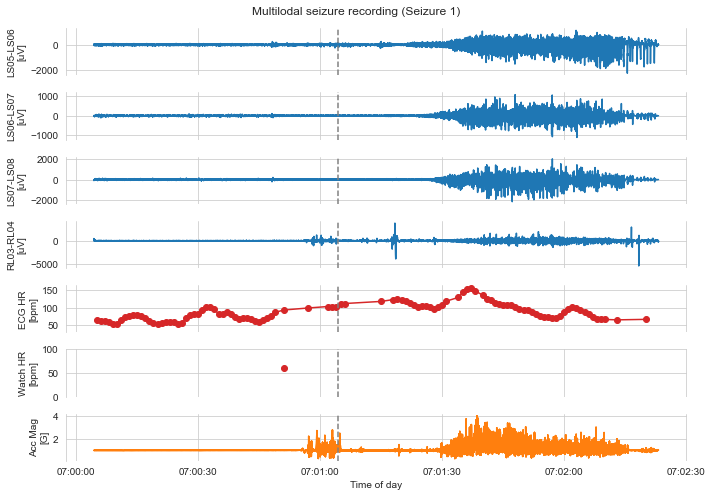

In [175]:
rw = len(eeg_channels)+3

fig, ax = plt.subplots(rw, 1, figsize=(10,rw), sharex=True)
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 10})

for i in range(len(eeg_channels)):
    axi = ax[i]
    axi.plot(eeg_all.index, eeg_all[eeg_channels[i]])
    axi.set_ylabel("%s\n[uV]" %(eeg_channels[i]))
    

axi = ax[len(eeg_channels)]
axi.plot(ecg_hr.index, ecg_hr['heartRate'],'o-', color='C3')
axi.set_ylabel("ECG HR\n[bpm]")
axi.set_ylim([30,165])

axi = ax[len(eeg_channels)+1]
axi.plot(watch_hr['heartRate'].dropna(),'o-', color='C3')
axi.set_ylabel("Watch HR\n[bpm]")
axi.set_ylim([0,100])

# watch_acc
axi = ax[len(eeg_channels)+2]
axi.plot(watch_acc.index, watch_acc['mag'], color='C1')
axi.set_ylabel("Acc Mag\n[G]")
axi.set_xlabel("Time of day")

for a in ax:
    a.axvline(x=sz_start_real, ls='--', color='grey')


# xformatter = matplotlib.dates.DateFormatter('%H:%M')
# axi.xaxis.set_major_formatter(xformatter)

plt.suptitle("Multilodal seizure recording (Seizure 1)")
sns.despine(bottom=True)


plt.tight_layout()
# plt.savefig("./../../figures/%s_%s_%s.png" %(subject_name,start_time_sec,end_time_sec), dpi = 300, bbox_inches='tight')
plt.show()

# Second seizure

In [198]:
# reload library
importlib.reload(sys.modules['helpers'])
from helpers import *

In [199]:
subject_name = "LB3_005_phaseII"    # metadata_subject_name --> + _D02
metadata_subject_name = "LB3_005_phaseII_D02"
metadata = pd.DataFrame(json.load(open("./tools/subject_metadata_jp.json"))).T

In [200]:
real_start = pd.to_datetime(metadata.loc[subject_name]['Start day/time']).tz_convert(tz)
#time delta between real start and 1970-01-01 00:00
delta = pd.to_datetime(metadata.loc[subject_name]['Start day/time']).tz_convert(tz)-pd.to_datetime('1970-1-1').tz_localize(tz)
delta_time  = delta-pd.to_timedelta(delta.days, unit='days')

In [201]:

start_time_sec = 412652.665551 - 60 # showing starting 1 minute before the seizure
end_time_sec = 412652.665551 + 133

#start time with ref to real date but correct time of day
sz_start_real= real_start + pd.to_timedelta(412652.665551, unit='s')
sz_end_real = real_start + pd.to_timedelta(412652.665551 + 133 , unit='s')

#start time with ref to real date but correct time of day
seg_start_real = real_start + pd.to_timedelta(start_time_sec, unit='s')
seg_end_real = real_start + pd.to_timedelta(end_time_sec, unit='s')

#start time with ref to 1970 date but correct time of day
seg_start_1970= seg_start_real - pd.to_timedelta(delta.days, unit='days')
seg_end_1970 = seg_end_real- pd.to_timedelta(delta.days, unit='days')

In [202]:
#get data from portal
portal_name = metadata.loc[metadata_subject_name]['portal_ID']  # used to be [subject_name]
ds = s.open_dataset(portal_name)

## Get EEG Data 


In [203]:
data_pull_min=1
clip_duration_sec =  end_time_sec - start_time_sec
clip_duration_min = clip_duration_sec / 60

# how many data_pull_min minute data pulls are there?
n_iter = int(np.ceil(clip_duration_min / data_pull_min))

eeg_channels = ['LA01',
 'LA02',
 'LA03']

## Read saved data

In [204]:
iEEG_filename = 'HUP227_phaseII_D02'
file = f"../data/eeg_pt-{iEEG_filename}_start-{start_time_sec}_end-{end_time_sec}.h5" %()
eeg_all = pd.read_hdf(file, key='ieeg')

In [205]:
#shift to real time
eeg_all.index = eeg_all.index + pd.to_datetime('1970-1-1').tz_localize(tz) + delta

In [206]:
eeg_channels = eeg_all.columns[[16,17,18,25]]

## Shifting time & cut data

In [207]:
#fetch saved ecg hr, watch and acc data
data_root = "/gdrive/public/DATA/Human_Data/LB3_PIONEER/"
ecg_hr = fetch_h5(subject_name, data_root, "ecg_heart")
watch_hr = fetch_h5(subject_name, data_root, "watch_heart")
######### no watch accelerometer file for this patient ########
# watch_acc = fetch_h5(subject_name, data_root, "watch_acc")


# #shift ecg/wearables data to 1970 keeping time correct
# ecg_hr.index= ecg_hr.index - pd.to_timedelta(delta.days, unit='days')
# watch_hr.index= watch_hr.index - pd.to_timedelta(delta.days, unit='days')
# watch_acc.index= watch_acc.index - pd.to_timedelta(delta.days, unit='days')

# #cutting data to selected range
ecg_hr = ecg_hr[(ecg_hr.index>seg_start_real) & (ecg_hr.index< seg_end_real)]
watch_hr = watch_hr[(watch_hr.index>seg_start_real) & (watch_hr.index< seg_end_real)]
######### no watch accelerometer file for this patient ########
# watch_acc = watch_acc[(watch_acc.index>seg_start_real) & (watch_acc.index< seg_end_real)]

######### no watch accelerometer file for this patient ########
# Calc Acc magnitude
# watch_acc['mag'] = np.sqrt(np.sum(watch_acc**2, axis=1))

['ecg_heart.h5']
['watch_heart.h5']


## Plotting selected data

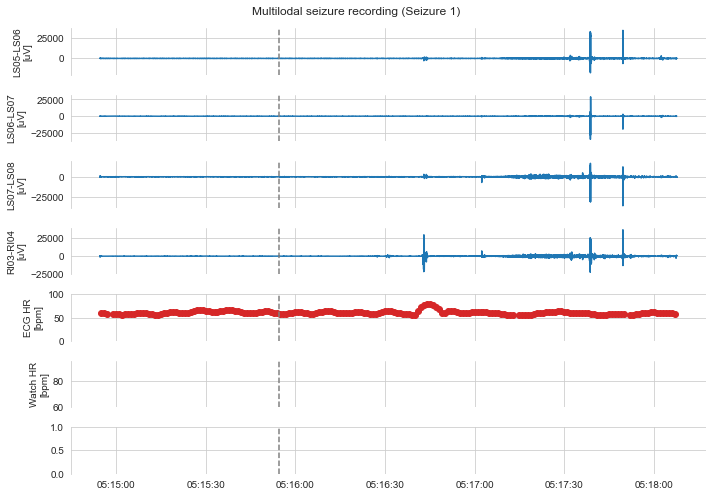

In [208]:
rw = len(eeg_channels)+3

fig, ax = plt.subplots(rw, 1, figsize=(10,rw), sharex=True)
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 10})

for i in range(len(eeg_channels)):
    axi = ax[i]
    axi.plot(eeg_all.index, eeg_all[eeg_channels[i]])
    axi.set_ylabel("%s\n[uV]" %(eeg_channels[i]))
    

axi = ax[len(eeg_channels)]
axi.plot(ecg_hr.index, ecg_hr['heartRate'],'o-', color='C3')
axi.set_ylabel("ECG HR\n[bpm]")
axi.set_ylim([0,100])

axi = ax[len(eeg_channels)+1]
axi.plot(watch_hr['heartRate'].dropna(),'o-', color='C3')
axi.set_ylabel("Watch HR\n[bpm]")
axi.set_ylim([60,95])

######### no watch accelerometer file for this patient ########
# axi = ax[len(eeg_channels)+2]
# axi.plot(watch_acc.index, watch_acc['mag'], color='C1')
# axi.set_ylabel("Acc Mag\n[G]")
# axi.set_xlabel("Time of day")

for a in ax:
    a.axvline(x=sz_start_real, ls='--', color='grey')


# xformatter = matplotlib.dates.DateFormatter('%H:%M')
# axi.xaxis.set_major_formatter(xformatter)

plt.suptitle("Multilodal seizure recording (Seizure 1)")
sns.despine(bottom=True)


plt.tight_layout()
# plt.savefig("./../../figures/%s_%s_%s.png" %(subject_name,start_time_sec,end_time_sec), dpi = 300, bbox_inches='tight')
plt.show()